# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [21]:
# you are free to use any package you deem fit
from sklearn.neural_network import MLPClassifier
import numpy as np

## Dataset

In [22]:
# DO NOT MODIFY
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

## Training

In [23]:
# Create model with adam optimizer
mlp = MLPClassifier(solver="adam", alpha=1e-5, hidden_layer_sizes=(16, 16), random_state=1)
# Fit the model to the generated dataset
mlp.fit(X, Y)

/Users/nathan/opt/miniconda3/envs/tensorflow-macos/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16, 16), random_state=1)

## Testing / Optimization

In [24]:
# Split some data for testing
# Initial R^2 value
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=1)
mlp.score(X_test, y_test)

0.9266666666666666

The code below used for visualizing the performance of the MLP was borrowed and edited from this sklearn example through the scikit-learn.org site. Source: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

/Users/nathan/opt/miniconda3/envs/tensorflow-macos/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nathan/opt/miniconda3/envs/tensorflow-macos/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


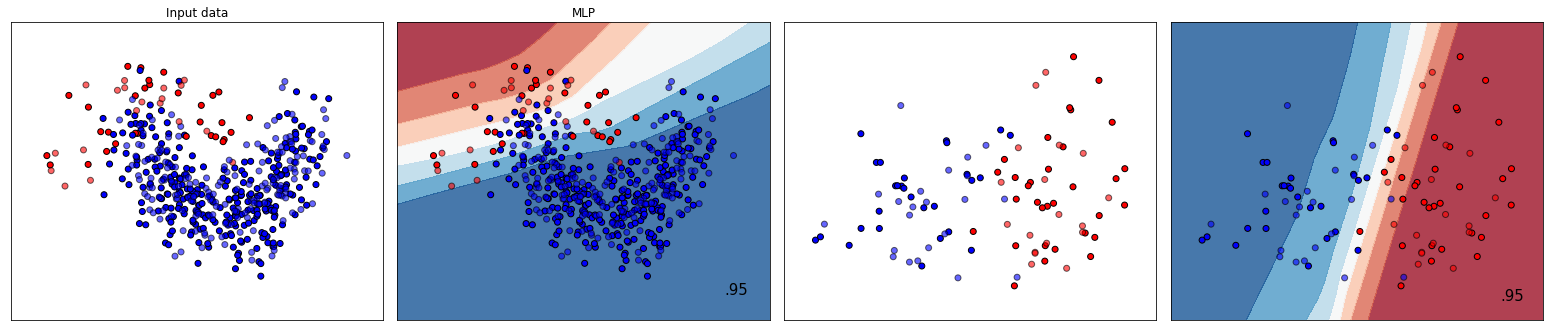

In [34]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.inspection import DecisionBoundaryDisplay

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.25, n_samples=(50, 450), random_state=42),
    (X, y),
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), 5, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    ax = plt.subplot(len(datasets), 5, i)

    ### ACTUAL USE OF THE MLP MODEL OCCURS HERE ###
    # clf = make_pipeline(StandardScaler(), clf)
    mlp.fit(X_train, y_train)
    score = mlp.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(
        mlp, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
    )

    # Plot the training points
    ax.scatter(
        X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
    )
    # Plot the testing points
    ax.scatter(
        X_test[:, 0],
        X_test[:, 1],
        c=y_test,
        cmap=cm_bright,
        edgecolors="k",
        alpha=0.6,
    )

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title("MLP")
    ax.text(
        x_max - 0.3,
        y_min + 0.3,
        ("%.2f" % score).lstrip("0"),
        size=15,
        horizontalalignment="right",
    )
    i += 1

plt.tight_layout()
plt.show()

## Performance Analysis

The above model peformed very well in creating accurate decision boundaries for both "moon" datasets. The model is a bit tentatice in creating strong divisions, but the initial R^2 value indicates and strong correlation in its prediction to true values. It is important to note though that there could be an element of overfitting since I was not able to create a train test split that does not utlize some of the training data in the testing data, but this should be largely negligable given a dataset of this size.